In [1]:
import matplotlib.pyplot as plt
import pandas as pd

In [66]:
pd.read_json("training_results_final.json")
df.head(5)

,index,timestamps,episode_lengths,episode_rewards,steps
0,0,3.460460,12,-1048.352339,12
1,1,120.625966,56,-1147.609186,68
2,2,262.444564,45,-1101.776123,113
3,3,290.714927,9,-986.337171,122
4,4,303.573622,4,-996.092004,126


In [67]:
df["steps"] = df["episode_lengths"].cumsum()
df.to_json("training_results_final.json")

In [68]:
df.head(5)

,index,timestamps,episode_lengths,episode_rewards,steps
0,0,3.460460,12,-1048.352339,12
1,1,120.625966,56,-1147.609186,68
2,2,262.444564,45,-1101.776123,113
3,3,290.714927,9,-986.337171,122
4,4,303.573622,4,-996.092004,126


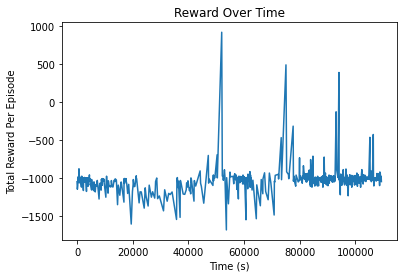

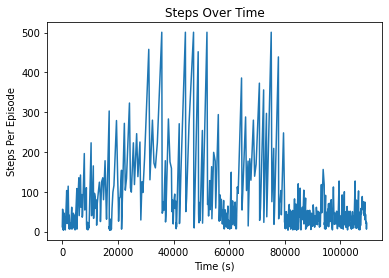

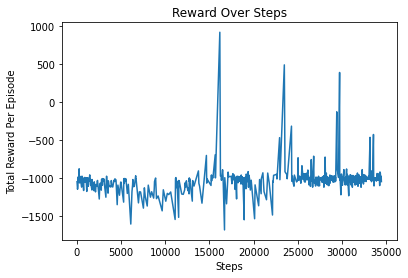

In [70]:
plt.figure()
plt.plot(df["timestamps"], df["episode_rewards"])
plt.xlabel("Time (s)")
plt.ylabel("Total Reward Per Episode")
plt.title("Reward Over Time")

plt.figure()
plt.plot(df["timestamps"], df["episode_lengths"])
plt.xlabel("Time (s)")
plt.ylabel("Steps Per Episode")
plt.title("Steps Over Time")

plt.figure()
plt.plot(df["steps"], df["episode_rewards"])
plt.xlabel("Steps")
plt.ylabel("Total Reward Per Episode")
plt.title("Reward Over Steps")

plt.show()

In [7]:
from pathlib import Path
import glob
import os

# Read in airsim recording data from most recent test
airsim_dir = Path.home().joinpath("Documents").joinpath("AirSim")  # .joinpath("2020-11-23-23-48-57")
list_of_files = glob.glob(str(airsim_dir.joinpath('*')) + '/') # * means all if need specific format then *.csv
latest_file = max(list_of_files, key=os.path.getctime)
airsim_dir = Path().joinpath(latest_file)
filename = "airsim_rec.txt"
path = str(airsim_dir.joinpath(filename))
test = pd.read_csv(path, sep='\t', lineterminator='\n')

test.head()

,TimeStamp,POS_X,POS_Y,POS_Z,Q_W,Q_X,Q_Y,Q_Z,ImageFile
0,1606196500384,0.0,0.0,-1.995959,1.0,-0.0,0.0,0.0,img__0_1606193337196342300.png;img_0_0_1606193...
1,1606196511430,0.0,0.0,-1.995959,1.0,-0.0,0.0,0.0,img__0_1606193337228057300.png;img_0_0_1606193...
2,1606196526883,0.0,0.0,-1.995959,1.0,-0.0,0.0,0.0,img__0_1606193337274490300.png;img_0_0_1606193...
3,1606196539133,0.0,0.0,-1.995959,1.0,-0.0,0.0,0.0,img__0_1606193337315706100.png;img_0_0_1606193...
4,1606196553686,0.0,0.0,-1.995959,1.0,-0.0,0.0,0.0,img__0_1606193337359725600.png;img_0_0_1606193...


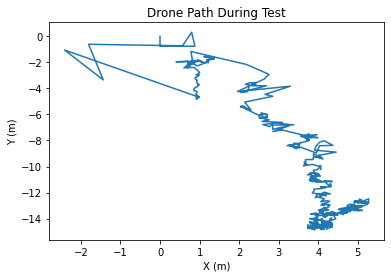

In [8]:
plt.figure()
plt.plot(test['POS_X'], test['POS_Y'])
plt.title('Drone Path During Test')
plt.xlabel("X (m)")
plt.ylabel("Y (m)")

plt.show()